In [1]:
# dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# twitter keys
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

# tweepy api authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
# sentiment analysis
target_user = ('@bbc', '@cbs', '@cnn', '@foxnews', '@nytimes')
overall_compound, all_tweets = [], []

for user in target_user:
    compound_list, pos_list, neu_list, neg_list = [], [], [], []
    
    for x in range(5):
        public_tweets = api.user_timeline(user, page=x)

        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet['text'])
            compound_list.append(results['compound'])
            pos_list.append(results['pos'])
            neu_list.append(results['neu'])
            neg_list.append(results['neg'])
            results_list= {'source': user, 'tweet': tweet['text'], 'time': tweet['created_at'],
                           'compound': results['compound'], 'positive': results['pos'], 'neutral': results['neu'],
                           'negative': results['neg']}
            all_tweets.append(results_list)
    
    compound_results = {'username': user, 'compound': np.mean(compound_list)}
    overall_compound.append(compound_results)

In [12]:
# dataframe with all tweets from all news orgs
all_tweets_df = []
all_tweets_df = pd.DataFrame(all_tweets).round(3)
all_tweets_df = all_tweets_df[['source', 'tweet', 'time', 'compound', 'positive', 'neutral', 'negative']]
all_tweets_df.to_csv('sentiment_analysis.csv')

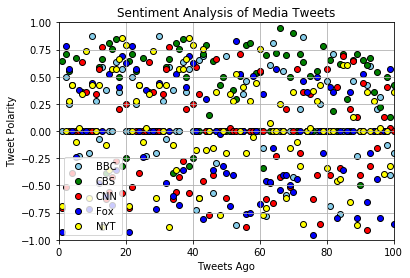

In [14]:
# plot 1: tweet sentiment
tweets_ago = np.arange(1,101).tolist()
compound_bbc = all_tweets_df.loc[all_tweets_df['source']=='@bbc', 'compound'].tolist()
compound_cbs = all_tweets_df.loc[all_tweets_df['source']=='@cbs', 'compound'].tolist()
compound_cnn = all_tweets_df.loc[all_tweets_df['source']=='@cnn', 'compound'].tolist()
compound_fox = all_tweets_df.loc[all_tweets_df['source']=='@foxnews', 'compound'].tolist()
compound_nyt = all_tweets_df.loc[all_tweets_df['source']=='@nytimes', 'compound'].tolist()

plot_bbc = plt.scatter(tweets_ago, compound_bbc, color='skyblue', edgecolors='black')
plot_cbs = plt.scatter(tweets_ago, compound_cbs, color='green', edgecolors='black')
plot_cnn = plt.scatter(tweets_ago, compound_cnn, color='red', edgecolors='black')
plot_fox = plt.scatter(tweets_ago, compound_fox, color='blue', edgecolors='black')
plot_nyt = plt.scatter(tweets_ago, compound_nyt, color='yellow', edgecolors='black')

plt.xlim(0,100)
plt.ylim(-1,1)
plt.legend((plot_bbc, plot_cbs, plot_cnn, plot_fox, plot_nyt),
           ('BBC', 'CBS', 'CNN', 'Fox', 'NYT'),
           scatterpoints=1,
           loc='best')
plt.grid()
plt.title('Sentiment Analysis of Media Tweets')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.savefig('plot_1.png')
plt.show()

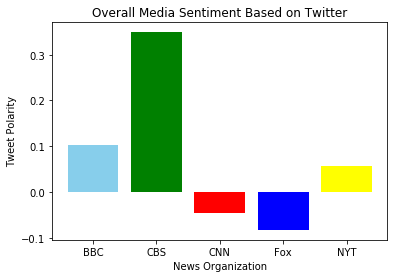

In [15]:
# plot 2: overall sentiment
overall_compound_df = pd.DataFrame(overall_compound).round(3)
overall_compound_df = overall_compound_df[['username', 'compound']]
bar_colors = ['skyblue', 'green', 'red', 'blue', 'yellow']
x_ticks = ['BBC', 'CBS', 'CNN', 'Fox', 'NYT']
plt.bar(x_ticks, overall_compound_df['compound'], color=bar_colors)
plt.title('Overall Media Sentiment Based on Twitter')
plt.xlabel('News Organization')
plt.ylabel('Tweet Polarity')
plt.savefig('plot_2.png')
plt.show()